In [1]:
# Set up packages for lecture. Don't worry about understanding this code, but
# make sure to run it if you're following along.
import numpy as np
import babypandas as bpd
import pandas as pd
from matplotlib_inline.backend_inline import set_matplotlib_formats
import matplotlib.pyplot as plt
set_matplotlib_formats("svg")
plt.style.use('ggplot')

np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option("display.max_rows", 7)
pd.set_option("display.max_columns", 8)
pd.set_option("display.precision", 2)

# Animations
import ipywidgets as widgets
from IPython.display import display, HTML

# Lecture 21 – Spread, The Normal Distribution

## DSC 10, Fall 2022

### Announcements

- Homework 6 is due **tomorrow at 11:59pm**.
- Lab 7 is due **Saturday 11/19 at 11:59pm**.
- The Final Project is released, and has two deadlines:
    - The **checkpoint** is due **Thursday 11/17 at 11:59pm**. No slip days!
    - The **final submission** is due **Tuesday 11/29 at 11:59pm**. Slip days allowed.
- Tomorrow from 10-11am in the SDSC Auditorium, come talk to Janine, Suraj, and other HDSI faculty at the HDSI faculty/student mixer!

### Agenda

- Recap: Mean and median.
- Standard deviation.
- Standardization.
- The normal distribution.

## Recap: Mean and median

### Example: Flight delays ✈️

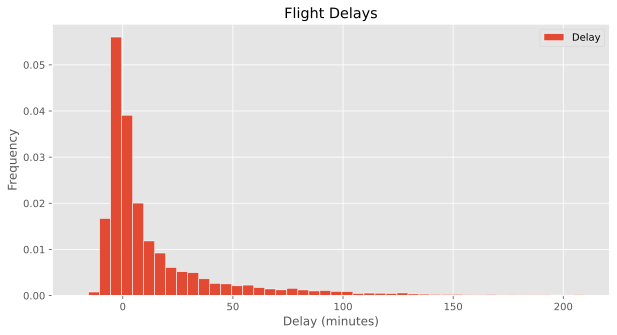

In [3]:
delays = bpd.read_csv('data/delays.csv')
delays.plot(kind='hist', y='Delay', bins=np.arange(-20.5, 210, 5), density=True, ec='w', figsize=(10, 5), title='Flight Delays')
plt.xlabel('Delay (minutes)');

**Question:** Which is larger – the mean or the median?

In [4]:
delays.get('Delay').mean()

16.658155515370705

In [5]:
delays.get('Delay').median()

2.0

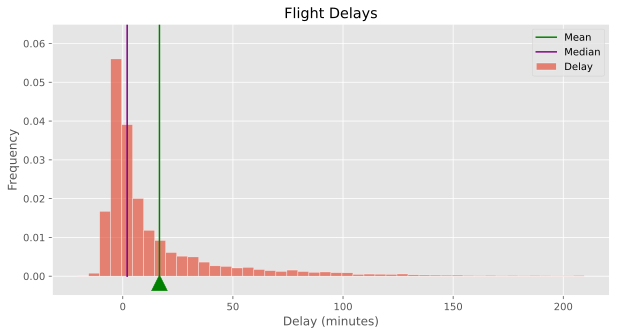

In [6]:
delays.plot(kind='hist', y='Delay', bins=np.arange(-20.5, 210, 5), density=True, ec='w', alpha=0.65, figsize=(10, 5), title='Flight Delays')
plt.plot([delays.get('Delay').mean(), delays.get('Delay').mean()], [0, 1], color='green', label='Mean')
plt.scatter([delays.get('Delay').mean()], [-0.0017], color='green', marker='^', s=250)
plt.plot([delays.get('Delay').median(), delays.get('Delay').median()], [0, 1], color='purple', label='Median')
plt.xlabel('Delay (minutes)')
plt.ylim(-0.005, 0.065)
plt.legend();

### Comparing the mean and median
- **Mean:** Balance point of the histogram.
    - Numerically: the sum of the differences between all data points and the mean is 0.
    - Physically: Think of a see-saw.

- **Median:** Half-way point of the data.
    - Half of the area of a histogram is to the left of the median, and half is to the right.


- If the distribution is symmetric about a value, then that value is both the mean and the median.
- If the distribution is **skewed**, then the mean is pulled away from the median in the direction of the tail.

- **Key property:** The median is more **robust** (less **sensitive**) to **outliers**.

## Standard deviation

### Question: How "wide" is a distribution? 

- **One idea**:
    - The *range* quantifes how far the extreme values are from one another (max - min).
    - Issue: this doesn’t tell us much about the shape of the distribution.

- **Another idea**:
    - The mean is at the center. 
    - The *standard deviation* quantifies how far the data points typically are from the center.

### Deviations from the mean

In [7]:
data = np.array([2, 3, 3, 9])
np.mean(data)

4.25

In [11]:
deviations = data - np.mean(data)
deviations

array([-2.25, -1.25, -1.25,  4.75])

Each entry in `deviations` describes how far the corresponding element in `data` is from 4.25.

What is the average deviation?

In [19]:
abs(deviations).mean()

2.375

- This is true of any dataset – the average deviation from the mean is always 0.
- This implies that the average deviation itself is not useful in measuring the spread of data.

### Average **squared** deviation

In [13]:
# Square all the deviations:
deviations ** 2

array([ 5.06,  1.56,  1.56, 22.56])

In [14]:
variance = np.mean(deviations ** 2)
variance

7.6875

This quantity, the average squared deviation from the mean, is called the **variance**.

### Standard deviation

- Our data usually has units, e.g. dollars.
- The variance is in "squared" units, e.g. $\text{dollars}^2$.
- To account for this, we can take the square root of the variance, and the result is called the **standard deviation**.

In [15]:
# Standard deviation (SD) is the square root of the variance.
sd = variance ** 0.5
sd

2.7726341266023544

### Standard deviation

- The standard deviation (SD) measures something about how far the data values are from their average.
    - It is not directly interpretable because of the squaring and square rooting.
    - But generally, **larger SD = more spread out**.

- The standard deviation has the same units as the original data.

- `numpy` has a function, `np.std`, that calculates the standard deviation for us.

In [20]:
# Note that this evaluates to the same number we found on the previous slide.
np.std(data)

2.7726341266023544

### Variance and standard deviation

To summarize:

$$\begin{align*}\text{variance} &= \text{average squared deviation from the mean}\\
&= \frac{(\text{value}_1 - \text{mean})^2 + ... + (\text{value}_n - \text{mean})^2}{n}\\
\text{standard deviation} &= \sqrt{\text{variance}}
\end{align*}$$

where $n$ is the number of observations.

### What can we do with the standard deviation?

It turns out, in **any** numerical distribution, the bulk of the data are in the range “mean ± a few SDs”.

Let's make this more precise.

### Chebyshev’s inequality

**Fact:** In **any** numerical distribution, the proportion of values in the range “mean ± $z$ SDs” is at least 

$$1 - \frac{1}{z^2}$$

|Range|Proportion|
|---|---|
|mean ± 2 SDs|	at least $1 - \frac{1}{4}$   (75%)|
|mean ± 3 SDs|	at least $1 - \frac{1}{9}$   (88.88..%)|
|mean ± 4 SDs|	at least $1 - \frac{1}{16}$ (93.75%)|
|mean ± 5 SDs|	at least $1 - \frac{1}{25}$  (96%)|


### Flight delays, revisited

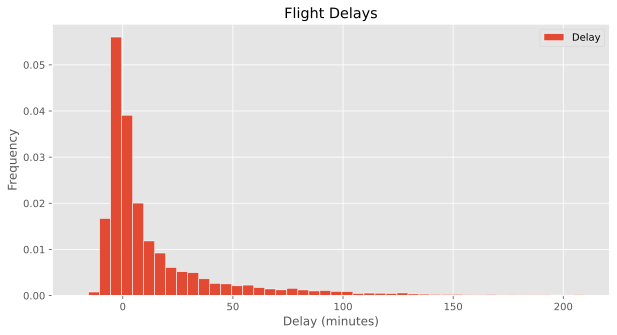

In [21]:
delays.plot(kind='hist', y='Delay', bins=np.arange(-20.5, 210, 5), density=True, ec='w', figsize=(10, 5), title='Flight Delays')
plt.xlabel('Delay (minutes)');

In [22]:
delay_mean = delays.get('Delay').mean()
delay_mean

16.658155515370705

In [23]:
delay_std = np.std(delays.get('Delay')) # There is no .std() method in babypandas!
delay_std

39.480199851609314

### Mean and standard deviation

Chebyshev's inequality tells us that

- **At least** 75% of delays are in the following interval:

In [24]:
delay_mean - 2 * delay_std, delay_mean + 2 * delay_std

(-62.30224418784792, 95.61855521858934)

- **At least** 88.88% of delays are in the following interval:

In [26]:
delay_mean - 3 * delay_std, delay_mean + 3 * delay_std

(-101.78244403945723, 135.09875507019865)

Let's visualize these intervals!

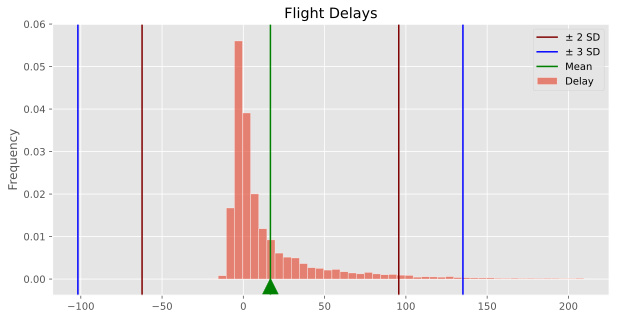

In [27]:
delays.plot(kind='hist', y='Delay', bins=np.arange(-20.5, 210, 5), density=True, alpha=0.65, ec='w', figsize=(10, 5), title='Flight Delays')
plt.axvline(delay_mean - 2 * delay_std, color='maroon', label='± 2 SD')
plt.axvline(delay_mean + 2 * delay_std, color='maroon')

plt.axvline(delay_mean + 3 * delay_std, color='blue',  label='± 3 SD')
plt.axvline(delay_mean - 3 * delay_std, color='blue')

plt.axvline(delay_mean, color='green', label='Mean')
plt.scatter([delay_mean], [-0.0017], color='green', marker='^', s=250)
plt.ylim(-0.0038, 0.06)
plt.legend();

### Chebyshev's inequality provides _lower_ bounds!

Remember, Chebyshev's inequality states that **at least** $1 - \frac{1}{z^2}$ of values are within $z$ SDs from the mean, for any numerical distribution.

For instance, it tells us that **at least** 75% of delays are in the following interval:

In [28]:
delay_mean - 2 * delay_std, delay_mean + 2 * delay_std

(-62.30224418784792, 95.61855521858934)

However, in this case, a much larger fraction of delays are in that interval.

In [30]:
within_2_sds = delays[(delays.get('Delay') >= delay_mean - 2 * delay_std) & 
                      (delays.get('Delay') <= delay_mean + 2 * delay_std)]

within_2_sds.shape[0] / delays.shape[0]

0.9560940325497288

If we know more about the shape of the distribution, we can provide better guarantees for the proportion of values within $z$ SDs of the mean.

### Activity

For a particular set of data points, Chebyshev's inequality states that at least $\frac{8}{9}$ of the data points are between -20 and 40. What is the standard deviation of the data?

In [35]:
1 - 1/3**2

0.8888888888888888


<details><summary>Click here to see the answer <b>after</b> you've tried it yourself.</summary>

- Chebyshev's inequality states that at least $1 - \frac{1}{z^2}$ of values are within $z$ standard deviations of the mean.
- When $z = 3$, $1 - \frac{1}{z^2} = \frac{8}{9}$.
- So, -20 is 3 standard deviations below the mean, and 40 is 3 standard deviations above the mean.
- 10 is in the middle of -20 and 40, so the mean is 10.
- 3 standard deviations are between 10 and 40, so 1 standard deviation is $\frac{30}{3} = 10$.
</details>

## Standardization

### Heights and weights 📏

We'll work with a data set containing the heights and weights of 5000 adult males.

In [36]:
height_and_weight = bpd.read_csv('data/height_and_weight.csv')
height_and_weight

,Height,Weight
0,73.85,241.89
1,68.78,162.31
2,74.11,212.74
...,...,...
4997,67.01,199.20
4998,71.56,185.91
4999,70.35,198.90


### Distributions of height and weight

Let's look at the distributions of both numerical variables.

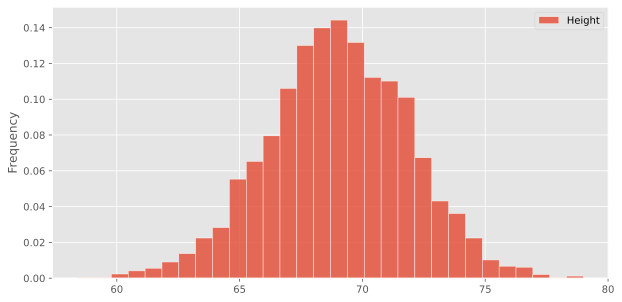

In [37]:
height_and_weight.plot(kind='hist', y='Height', density=True, ec='w', bins=30, alpha=0.8, figsize=(10, 5));

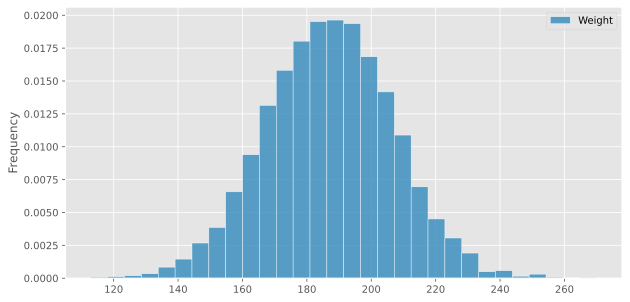

In [38]:
height_and_weight.plot(kind='hist', y='Weight', density=True, ec='w', bins=30, alpha=0.8, color='C1', figsize=(10, 5));

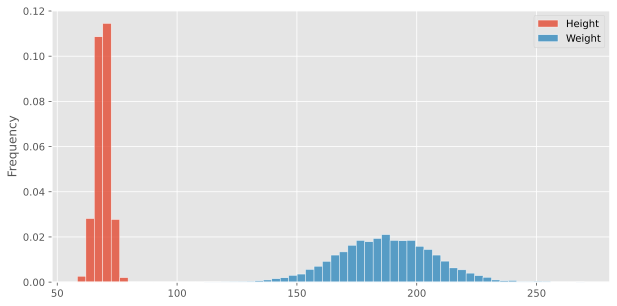

In [39]:
height_and_weight.plot(kind='hist', density=True, ec='w', bins=60, alpha=0.8, figsize=(10, 5));

**Observation**: The two distributions look like shifted and stretched versions of the same basic shape, called a bell curve 🔔.

### Standard units

Suppose $x$ is a numerical variable, and $x_i$ is one value of that variable. The function $$z(x_i) = \frac{x_i - \text{mean of $x$}}{\text{SD of $x$}}$$

converts $x_i$ to **standard units**, which represents the number of standard deviations $x_i$ is above the mean.

**Example**: Suppose someone weighs 225 pounds. What is their weight in standard units?

In [40]:
weights = height_and_weight.get('Weight')
(225 - weights.mean()) / np.std(weights)

1.920169918158094

- Interpretation: 225 is 1.92 standard deviations above the mean weight.
- 225 becomes 1.92 in **standard units**.

### Standardization

The process of converting all values of a variable (i.e. a column) to standard units is known as standardization, and the resulting values are considered to be **standardized**.

In [41]:
def standard_units(col):
    return (col - col.mean()) / np.std(col)

In [42]:
standardized_height = standard_units(height_and_weight.get('Height'))
standardized_height

0       1.68
1      -0.09
2       1.78
        ... 
4997   -0.70
4998    0.88
4999    0.46
Name: Height, Length: 5000, dtype: float64

In [43]:
standardized_weight = standard_units(height_and_weight.get('Weight'))
standardized_weight

0       2.77
1      -1.25
2       1.30
        ... 
4997    0.62
4998   -0.06
4999    0.60
Name: Weight, Length: 5000, dtype: float64

### The effect of standardization

Standardized variables have:
- A mean of 0.
- An SD of 1.

We often standardize variables to bring them to the same scale.

_Aside: To quickly see summary statistics for a numerical Series, use the `.describe()` Series method._

In [51]:
# e-14 means 10^(-14), which is a very small number, effectively zero.
standardized_height.describe()
standardized_height.describe()

count    5.00e+03
mean     1.64e-14
std      1.00e+00
           ...   
50%      4.76e-04
75%      6.85e-01
max      3.48e+00
Name: Height, Length: 8, dtype: float64

In [52]:
standardized_weight.describe()

count    5.00e+03
mean     1.64e-14
std      1.00e+00
           ...   
50%      6.53e-04
75%      6.74e-01
max      4.19e+00
Name: Weight, Length: 8, dtype: float64

Let's look at how the process of standardization works visually.

In [53]:
HTML('data/height_anim.html')

In [ ]:
HTML('data/weight_anim.html')

### Standardized histograms

Now that we've standardized the distributions of height and weight, let's see how they look on the same set of axes.

In [54]:
standardized_height_and_weight = bpd.DataFrame().assign(
    Height=standardized_height,
    Weight=standardized_weight
)

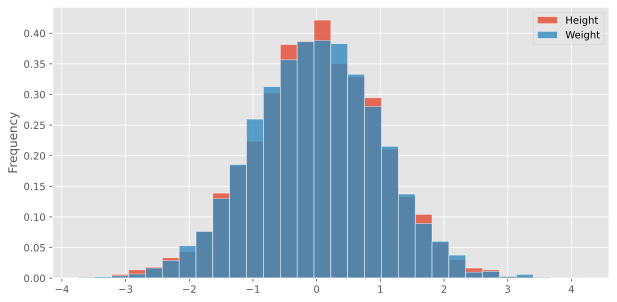

In [55]:
standardized_height_and_weight.plot(kind='hist', density=True, ec='w',bins=30, alpha=0.8, figsize=(10, 5));

These both look pretty similar!

## The standard normal distribution

### The standard normal distribution

- The distributions we've seen look essentially the same once standardized.
- This distribution is called the **standard normal distribution**. The shape is called the **standard normal curve**.

$$
\phi(z) = \frac{1}{\sqrt{2 \pi}} e^{-\frac{1}{2}z^2}
$$


- You don't need to know the formula – just the shape!
    - We'll just use the formula today to make plots.

### The standard normal curve

In [56]:
def normal_curve(z):
    return 1 / np.sqrt(2*np.pi) * np.exp((-z**2)/2)

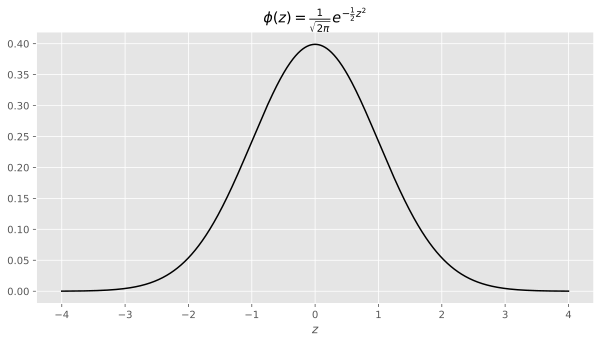

In [57]:
x = np.linspace(-4, 4, 1000)
y = normal_curve(x)

plt.figure(figsize=(10, 5))
plt.plot(x, y, color='black');
plt.xlabel('$z$');
plt.title(r'$\phi(z) = \frac{1}{\sqrt{2 \pi}} e^{-\frac{1}{2}z^2}$');

### Heights/weights are roughly normal

If a distribution follows this shape, we say it is roughly normal.

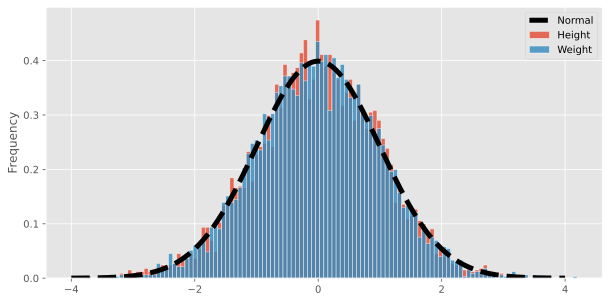

In [58]:
standardized_height_and_weight.plot(kind='hist', density=True, ec='w', bins=120, alpha=0.8, figsize=(10, 5));
plt.plot(x, y, color='black', linestyle='--', label='Normal', linewidth=5)
plt.legend(loc='upper right');

### The standard normal distribution

- Think of the normal distribution as a "continuous histogram".

- Its mean and median are both 0 – it is symmetric.

- It has inflection points at $\pm 1$.
    - More on this later.

- Like a histogram:
    - The **area** between $a$ and $b$ is the **proportion** of values between $a$ and $b$.
    - The total area underneath the normal curve is is 1.

In [59]:
def normal_area(a, b, bars=False):
    x = np.linspace(-4, 4, 1000)
    y = normal_curve(x)
    ix = (x >= a) & (x <= b)
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, color='black')
    plt.fill_between(x[ix], y[ix], color='gold')
    if bars:
        plt.axvline(a, color='red')
        plt.axvline(b, color='red')
    plt.title(f'Area between {np.round(a, 2)} and {np.round(b, 2)}')
    plt.show()

In [60]:
a = widgets.FloatSlider(value=0, min=-4,max=3,step=0.25, description='a')
b = widgets.FloatSlider(value=1, min=-4,max=4,step=0.25, description='b')
bars = widgets.Checkbox(value=False, description='bars')
ui = widgets.HBox([a, b, bars])
out = widgets.interactive_output(normal_area, {'a': a, 'b': b, 'bars': bars})
display(ui, out)

Output()

### Cumulative density functions

- The _cumulative density function_ (CDF) of a distribution is a function that takes in a value $z$ and returns the proportion of values in the distribution that are less than or equal to $z$, i.e. the area under the curve to the left of $z$.

- To find areas under curves, we typically use integration (calculus). However, the standard normal curve has no closed-form integral.

- Often, people refer to [tables](https://cnx.org/resources/b274d975cd31dbe51c81c6e037c7aebfe751ac19/UNneg-z.png) that contain approximations of the CDF of the standard normal distribution.

- We'll use an approximation built into the `scipy` module in Python. The function `scipy.stats.norm.cdf(z)` computes the **area under the standard normal curve to the left of `z`**.

### Areas under the standard normal curve

What does `scipy.stats.norm.cdf(0)` evaluate to? Why?

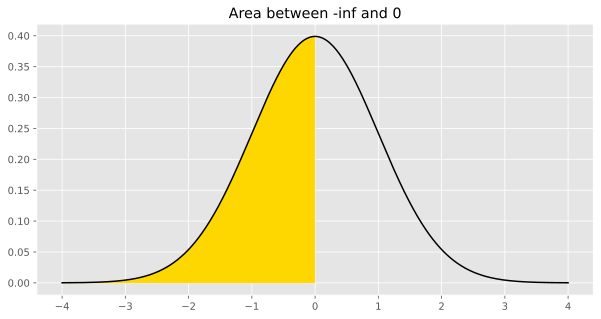

In [61]:
normal_area(-np.inf, 0)

In [62]:
from scipy import stats
stats.norm.cdf(0)

0.5

### Areas under the standard normal curve

Suppose we want to find the area to the **right** of 2 under the standard normal curve.

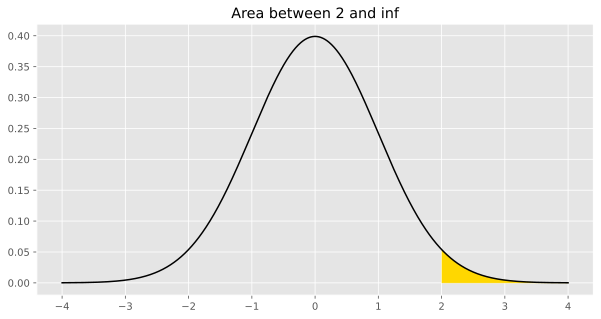

In [63]:
normal_area(2, np.inf)

The following expression gives us the area to the **left** of 2.

In [64]:
stats.norm.cdf(2)

0.9772498680518208

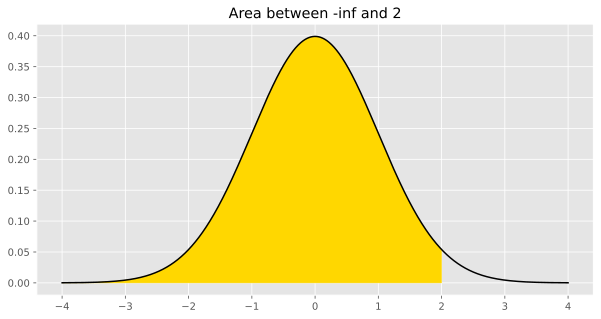

In [65]:
normal_area(-np.inf, 2)

However, since the total area under the standard normal curve is 1:

$$\text{area right of $2$} = 1 - (\text{area left of $2$})$$

In [66]:
1 - stats.norm.cdf(2)

0.02275013194817921

### Areas under the standard normal curve

How might we use `stats.norm.cdf` to compute the area between -1 and 0?

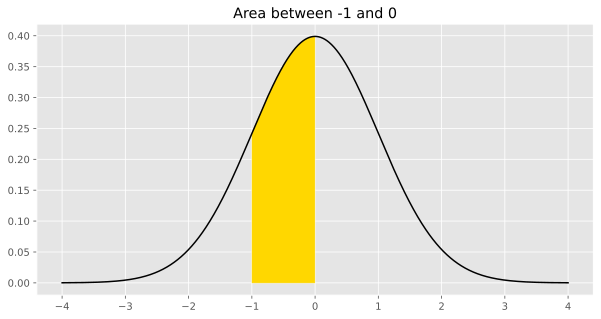

In [67]:
normal_area(-1, 0)

Strategy:

$$\text{area from $-1$ to $0$} = (\text{area left of $0$}) - (\text{area left of $-1$})$$

In [ ]:
stats.norm.cdf(0) - stats.norm.cdf(-1)

### General strategy for finding area

The area under a standard normal curve in the interval $[a, b]$ is 

```py
stats.norm.cdf(b) - stats.norm.cdf(a)
```

What can we do with this? We're about to see!

## Using the normal distribution

Let's return to our data set of heights and weights.

In [ ]:
height_and_weight

As we saw before, both variables are roughly normal. What _benefit_ is there to knowing that the two distributions are roughly normal?

### Standard units and the normal distribution

- **Key idea: The $x$-axis in a plot of the <u>standard</u> normal distribution is in <u>standard</u> units.**
    - For instance, the area between -1 and 1 is the proportion of values within 1 standard deviation of the mean.

- Suppose a distribution is (roughly) normal. Then, these are two are approximately equal:
    - The proportion of values in the distribution between $a$ and $b$.
    - The area between $z(a)$ and $z(b)$ under the standard normal curve. (Recall, $z(x_i) = \frac{x_i - \text{mean of $x$}}{\text{SD of $x$}}$.)

### Example: Proportion of weights between 200 and 225 pounds

Let's suppose, as is often the case, that we don't have access to the entire distribution of weights, just the mean and SD.

In [ ]:
weight_mean = weights.mean()
weight_mean

In [ ]:
weight_std = np.std(weights)
weight_std

Using just this information, we can estimate the proportion of weights between 200 and 225 pounds:

1. Convert 200 to standard units.
2. Convert 225 to standard units.
3. Use `stats.norm.cdf` to find the area between (1) and (2).

In [ ]:
left = (200 - weight_mean) / weight_std
left

In [ ]:
right = (225 - weight_mean) / weight_std
right

In [ ]:
normal_area(left, right)

In [ ]:
approximation = stats.norm.cdf(right) - stats.norm.cdf(left)
approximation

### Checking the approximation

Since we have access to the entire set of weights, we can compute the true proportion of weights between 200 and 225 pounds.

In [ ]:
# True proportion of values between 200 and 225.
height_and_weight[
    (height_and_weight.get('Weight') >= 200) &
    (height_and_weight.get('Weight') <= 225)
].shape[0] / height_and_weight.shape[0]

In [ ]:
# Approximation using the standard normal curve.
approximation

Pretty good for an approximation! 🤩

### Warning: Standardization doesn't make a distribution normal!

Consider the distribution of delays from earlier in the lecture.

In [ ]:
delays.plot(kind='hist', y='Delay', bins=np.arange(-20.5, 210, 5), density=True, ec='w', figsize=(10, 5), title='Flight Delays')
plt.xlabel('Delay (minutes)');

The distribution above does not look normal. It won't look normal even if we standardize it. By standardizing a distribution, all we do is move it horizontally and stretch it vertically – the shape itself doesn't change.

In [ ]:
HTML('data/delay_anim.html')

## Summary, next time

### Summary: Spread and Chebyshev's inequality

- Variance and standard deviation (SD) quantify how spread out data points are.
    - Standard deviation is the square root of variance.
    - Roughly speaking, the standard deviation describes how far values in a dataset typically are from the mean.
- Chebyshev's inequality states that, in any numerical distribution, the proportion of values within $z$ SDs of the mean is at least $1 - \frac{1}{z^2}$.
    - The true proportion of values within $z$ SDs of the mean may be larger than $1 - \frac{1}{z^2}$, depending on the distribution, but it cannot be smaller.

### Summary: Standard units and the normal distribution

- To convert a value $x_i$ from a column $x$ to standard units, use the function $z(x_i) = \frac{x_i - \text{mean of $x$}}{\text{SD of $x$}}$.
    - A value in standard units measures the number of SDs the value is above the mean.
- The normal distribution is bell-shaped, and arises often in nature.
- The $x$-axis of the **standard** normal distribution is in **standard** units.
- If we know a distribution is roughly normal, and we know its mean and SD, then we can use the standard normal distribution's curve to approximate the proportion of values within a given range without needing access to all of the data.

### Next time

- More properties of the normal distribution, and how they relate to Chebyshev's inequality.
- The Central Limit Theorem.
- Confidence intervals, revisited.